In [17]:
# Fetching Data Using Finnhub API

import finnhub
import pandas as pd
from textblob import TextBlob

# Setting-up client (using API key)
finnhub_client = finnhub.Client(api_key='ctjss39r01quipmv1vr0ctjss39r01quipmv1vrg')  

# Fetching news related to Apple (AAPL) from Finnhub API
res = finnhub_client.company_news('AAPL', _from="2024-01-01", to="2024-01-31")

# Converting the response into a pandas DataFrame for easier manipulation
z = pd.DataFrame(res)


In [19]:
# Adding sentiment scores for both headline and summary using TextBlob
z['headline_sentiment'] = z['headline'].apply(lambda x: TextBlob(x).sentiment.polarity)
z['summary_sentiment'] = z['summary'].apply(lambda x: TextBlob(x).sentiment.polarity)

# Displaying the first few rows of the DataFrame
print(z[['headline', 'summary', 'headline_sentiment', 'summary_sentiment']].head())



                                            headline  \
0  Tech earnings, jobless claims, mortgage rates:...   
1  Apple to report Q1 earnings as investors focus...   
2           12 Highest Quality Camera Phones in 2024   
3  Big Tech earnings are here. Fasten your seat b...   
4  Apple, Google Could Win the War for the Digita...   

                                             summary  headline_sentiment  \
0  Yahoo Finance Live Co-Hosts Josh Lipton and Ju...                 0.0   
1  Apple will report its Q1 earnings after the be...                 0.0   
2  In this article, we will be going through the ...                 0.0   
3  It's earnings season, and Big Tech is taking a...                 0.0   
4  Big Tech wants your financial life on its apps...                 0.4   

   summary_sentiment  
0           0.265702  
1           0.700000  
2           0.240625  
3           0.000000  
4           0.050000  


In [21]:
import pandas as pd

# Assuming 'z' is the DataFrame you have from Finnhub
# Converting 'datetime' column (epoch time) to a proper datetime format
z['date'] = pd.to_datetime(z['datetime'], unit='s').dt.date  # Convert to date

# Calculating daily average sentiment for both headline and summary
daily_sentiment = z.groupby('date').agg({'headline_sentiment': 'mean', 'summary_sentiment': 'mean'}).reset_index()

# Displaying the result
print(daily_sentiment.head())


         date  headline_sentiment  summary_sentiment
0  2024-01-26            0.000000           0.500000
1  2024-01-27            0.157143           0.183368
2  2024-01-28            0.190949           0.097123
3  2024-01-29            0.088456           0.133244
4  2024-01-30            0.141400           0.140265


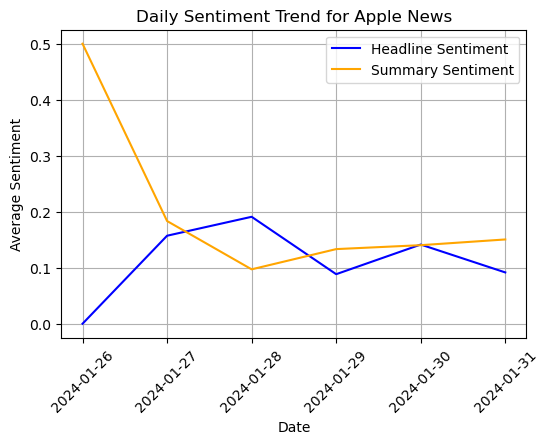

In [23]:
import matplotlib.pyplot as plt

# Plotting sentiment trends over time
plt.figure(figsize=(6, 4))

# Plotting both headline and summary sentiment
plt.plot(daily_sentiment['date'], daily_sentiment['headline_sentiment'], label='Headline Sentiment', color='blue')
plt.plot(daily_sentiment['date'], daily_sentiment['summary_sentiment'], label='Summary Sentiment', color='orange')

# Adding labels and title
plt.xlabel('Date')
plt.ylabel('Average Sentiment')
plt.title('Daily Sentiment Trend for Apple News')
plt.legend()
plt.xticks(rotation=45)
plt.grid(True)

plt.show()


In [41]:
import yfinance as yf
import pandas as pd

# Fetching historical data for AAPL (Apple)
stock_data = yf.download('AAPL', start='2024-01-01', end='2024-01-31', progress=False)

# Displaying the stock data
print(stock_data.head())


Price            Close        High         Low        Open    Volume
Ticker            AAPL        AAPL        AAPL        AAPL      AAPL
Date                                                                
2024-01-02  184.734970  187.521323  182.993502  186.237603  82488700
2024-01-03  183.351746  184.973804  182.535736  183.321893  58414500
2024-01-04  181.023163  182.197403  179.998185  181.261983  71983600
2024-01-05  180.296707  181.869006  179.291637  181.102771  62303300
2024-01-08  184.655365  184.695178  180.615161  181.202281  59144500


In [43]:
# Resetting the index, which will add the 'Date' column automatically
stock_data_reset = stock_data.reset_index()

# Verifying the structure of the DataFrame
print(stock_data_reset.head())

# Checking the closing price data
print(stock_data_reset[['Date', 'Close']].head())


Price        Date       Close        High         Low        Open    Volume
Ticker                   AAPL        AAPL        AAPL        AAPL      AAPL
0      2024-01-02  184.734970  187.521323  182.993502  186.237603  82488700
1      2024-01-03  183.351746  184.973804  182.535736  183.321893  58414500
2      2024-01-04  181.023163  182.197403  179.998185  181.261983  71983600
3      2024-01-05  180.296707  181.869006  179.291637  181.102771  62303300
4      2024-01-08  184.655365  184.695178  180.615161  181.202281  59144500
Price        Date       Close
Ticker                   AAPL
0      2024-01-02  184.734970
1      2024-01-03  183.351746
2      2024-01-04  181.023163
3      2024-01-05  180.296707
4      2024-01-08  184.655365


In [55]:
# Ensuring the 'date' column in daily_sentiment is in datetime format
daily_sentiment['date'] = pd.to_datetime(daily_sentiment['date'])

# Performing the merge after ensuring both dataframes have compatible columns
merged_df = pd.merge(daily_sentiment, stock_data_reset[['Date_', 'Close_AAPL']], left_on='date', right_on='Date_', how='inner')

# Displaying the merged data
print(merged_df.head())


        date  headline_sentiment  summary_sentiment      Date_  Close_AAPL
0 2024-01-26            0.000000           0.500000 2024-01-26  191.481903
1 2024-01-29            0.088456           0.133244 2024-01-29  190.795288
2 2024-01-30            0.141400           0.140265 2024-01-30  187.123260


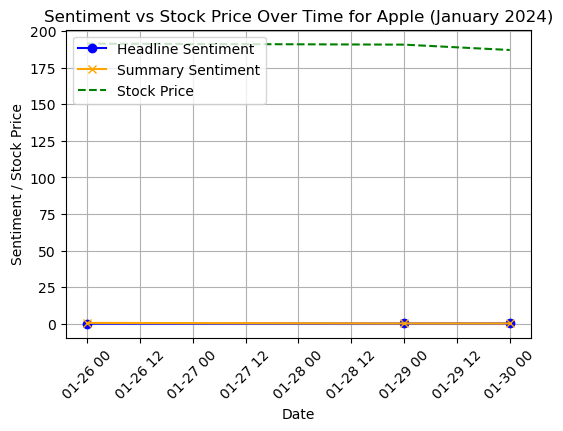

In [59]:
import matplotlib.pyplot as plt

# Plotting sentiment trends and stock price
plt.figure(figsize=(6, 4))

# Plotting headline sentiment
plt.plot(merged_df['date'], merged_df['headline_sentiment'], label='Headline Sentiment', color='blue', marker='o')

# Plotting summary sentiment
plt.plot(merged_df['date'], merged_df['summary_sentiment'], label='Summary Sentiment', color='orange', marker='x')

# Plotting stock closing price 
plt.plot(merged_df['date'], merged_df['Close_AAPL'], label='Stock Price', color='green', linestyle='--')

# Adding labels and title
plt.xlabel('Date')
plt.ylabel('Sentiment / Stock Price')
plt.title('Sentiment vs Stock Price Over Time for Apple (January 2024)')
plt.legend(loc='upper left')
plt.xticks(rotation=45)
plt.grid(True)

plt.show()


In [63]:
# Calculating the correlation between sentiment scores and stock price
correlation_headline = merged_df['headline_sentiment'].corr(merged_df['Close_AAPL'])
correlation_summary = merged_df['summary_sentiment'].corr(merged_df['Close_AAPL'])

print(f"Correlation between headline sentiment and stock price: {correlation_headline}")
print(f"Correlation between summary sentiment and stock price: {correlation_summary}")


Correlation between headline sentiment and stock price: -0.867531692479687
Correlation between summary sentiment and stock price: 0.6082706222350976


In [67]:
from scipy.stats import pearsonr

# Calculating the correlation and p-value for headline sentiment vs stock price
correlation_headline, p_value_headline = pearsonr(merged_df['headline_sentiment'], merged_df['Close_AAPL'])

# Calculating the correlation and p-value for summary sentiment vs stock price
correlation_summary, p_value_summary = pearsonr(merged_df['summary_sentiment'], merged_df['Close_AAPL'])

# Output of results
print(f"Correlation between headline sentiment and stock price: {correlation_headline}")
print(f"P-value for headline sentiment vs stock price: {p_value_headline}")

print()

print(f"Correlation between summary sentiment and stock price: {correlation_summary}")
print(f"P-value for summary sentiment vs stock price: {p_value_summary}")

print()

# Interpretation of results
if p_value_headline < 0.05:
    print("Headline sentiment correlation is statistically significant.")
else:
    print("Headline sentiment correlation is not statistically significant.")

if p_value_summary < 0.05:
    print("Summary sentiment correlation is statistically significant.")
else:
    print("Summary sentiment correlation is not statistically significant.")


Correlation between headline sentiment and stock price: -0.8675316924796866
P-value for headline sentiment vs stock price: 0.33141043413211557

Correlation between summary sentiment and stock price: 0.6082706222350973
P-value for summary sentiment vs stock price: 0.5837270837256414

Headline sentiment correlation is not statistically significant.
Summary sentiment correlation is not statistically significant.


*** Impact of Sentiment on stock market price ***

In [69]:
import pandas as pd
import yfinance as yf

# Fetching stock data for Apple (AAPL)
stock_data = yf.download('AAPL', start='2024-01-01', end='2024-01-31', progress=False)

# Checking the structure of stock_data (columns and index)
print("Stock data columns and index:")
print(stock_data.columns)  
print(stock_data.index)  


Stock data columns and index:
MultiIndex([( 'Close', 'AAPL'),
            (  'High', 'AAPL'),
            (   'Low', 'AAPL'),
            (  'Open', 'AAPL'),
            ('Volume', 'AAPL')],
           names=['Price', 'Ticker'])
DatetimeIndex(['2024-01-02', '2024-01-03', '2024-01-04', '2024-01-05',
               '2024-01-08', '2024-01-09', '2024-01-10', '2024-01-11',
               '2024-01-12', '2024-01-16', '2024-01-17', '2024-01-18',
               '2024-01-19', '2024-01-22', '2024-01-23', '2024-01-24',
               '2024-01-25', '2024-01-26', '2024-01-29', '2024-01-30'],
              dtype='datetime64[ns]', name='Date', freq=None)


In [71]:
import pandas as pd

# Flattening the multi-level columns
stock_data_reset = stock_data.copy()  
stock_data_reset.columns = ['_'.join(col).strip() for col in stock_data.columns]

# Checking the flattened columns
print(stock_data_reset.columns)


Index(['Close_AAPL', 'High_AAPL', 'Low_AAPL', 'Open_AAPL', 'Volume_AAPL'], dtype='object')


In [73]:
# Resetting the index to make 'Date' a regular column
stock_data_reset = stock_data_reset.reset_index()

# Verifying the 'Date' column is now a regular column
print(stock_data_reset.head())

        Date  Close_AAPL   High_AAPL    Low_AAPL   Open_AAPL  Volume_AAPL
0 2024-01-02  184.734970  187.521323  182.993502  186.237603     82488700
1 2024-01-03  183.351746  184.973804  182.535736  183.321893     58414500
2 2024-01-04  181.023163  182.197403  179.998185  181.261983     71983600
3 2024-01-05  180.296707  181.869006  179.291637  181.102771     62303300
4 2024-01-08  184.655365  184.695178  180.615161  181.202281     59144500


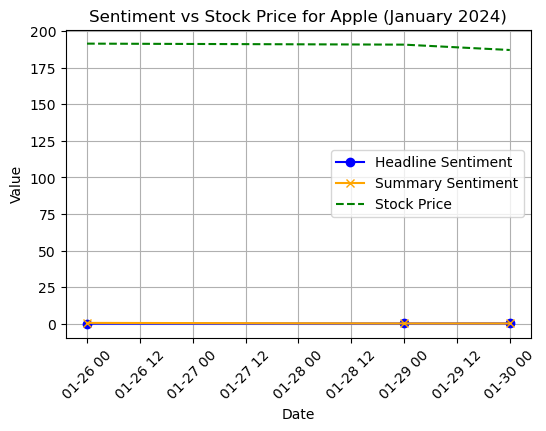

In [77]:
import matplotlib.pyplot as plt

# Now plotting 
plt.figure(figsize=(6, 4))

# Plotting headline sentiment
plt.plot(merged_df['Date_'], merged_df['headline_sentiment'], label='Headline Sentiment', color='blue', marker='o')

# Plotting summary sentiment
plt.plot(merged_df['Date_'], merged_df['summary_sentiment'], label='Summary Sentiment', color='orange', marker='x')

# Plotting stock close price (use 'Close_AAPL' instead of 'close_price')
plt.plot(merged_df['Date_'], merged_df['Close_AAPL'], label='Stock Price', color='green', linestyle='--')

# Adding labels and title
plt.xlabel('Date')
plt.ylabel('Value')
plt.title('Sentiment vs Stock Price for Apple (January 2024)')
plt.legend()
plt.xticks(rotation=45)
plt.grid(True)

plt.show()


In [81]:
# Calculating the correlation between sentiment scores and stock price
correlation_headline = merged_df['headline_sentiment'].corr(merged_df['Close_AAPL'])
correlation_summary = merged_df['summary_sentiment'].corr(merged_df['Close_AAPL'])

print(f"Correlation between headline sentiment and stock price: {correlation_headline}")
print(f"Correlation between summary sentiment and stock price: {correlation_summary}")


Correlation between headline sentiment and stock price: -0.867531692479687
Correlation between summary sentiment and stock price: 0.6082706222350976


In [85]:
import scipy.stats as stats

# Calculating Pearson correlation and p-value for headline sentiment vs stock price
corr_headline, p_value_headline = stats.pearsonr(merged_df['headline_sentiment'], merged_df['Close_AAPL'])
print(f"Correlation between headline sentiment and stock price: {corr_headline}")
print(f"P-value for headline sentiment vs stock price: {p_value_headline}")

print()

# Calculating Pearson correlation and p-value for summary sentiment vs stock price
corr_summary, p_value_summary = stats.pearsonr(merged_df['summary_sentiment'], merged_df['Close_AAPL'])
print(f"Correlation between summary sentiment and stock price: {corr_summary}")
print(f"P-value for summary sentiment vs stock price: {p_value_summary}")

print()

# Interpretation of the p-values
if p_value_headline < 0.05:
    print("The correlation between headline sentiment and stock price is statistically significant.")
else:
    print("The correlation between headline sentiment and stock price is not statistically significant.")

if p_value_summary < 0.05:
    print("The correlation between summary sentiment and stock price is statistically significant.")
else:
    print("The correlation between summary sentiment and stock price is not statistically significant.")


Correlation between headline sentiment and stock price: -0.8675316924796866
P-value for headline sentiment vs stock price: 0.33141043413211557

Correlation between summary sentiment and stock price: 0.6082706222350973
P-value for summary sentiment vs stock price: 0.5837270837256414

The correlation between headline sentiment and stock price is not statistically significant.
The correlation between summary sentiment and stock price is not statistically significant.


*** Time series prediction of stock value using various features ***

In [99]:
# Data Preparation and Preprocessing

import numpy as np
import pandas as pd
import yfinance as yf
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt

# Fetching Stock Data
# Fetching historical data for Apple (AAPL) for the past 6 months
stock_data = yf.download('AAPL', start='2023-07-01', end='2024-01-31', progress=False)

# Checking the stock data
print("Stock data head:")
print(stock_data.head())

# Fetching Sentiment Data (Ensure same length as stock data)
# Generating random sentiment values for demonstration 
dates = pd.date_range(start="2023-07-01", end="2024-01-31", freq='B') 

sentiment_data = {
    'date': dates,
    'headline_sentiment': np.random.uniform(-1, 1, size=len(dates)),  
    'summary_sentiment': np.random.uniform(-1, 1, size=len(dates)), 
}

# Creating the sentiment dataframe
sentiment_df = pd.DataFrame(sentiment_data)
sentiment_df['date'] = pd.to_datetime(sentiment_df['date'])

# Merging sentiment data with stock data on date
stock_data_reset = stock_data.reset_index()[['Date', 'Close']] 
stock_data_reset.columns = ['date', 'close_price']  

merged_df = pd.merge(stock_data_reset, sentiment_df, on='date', how='inner')

# Checking the merged data
print("Merged data head:")
print(merged_df.head())

# Feature Engineering
# Adding a simple Moving Average (e.g., 5-day moving average) as additional feature
merged_df['moving_avg_5'] = merged_df['close_price'].rolling(window=5).mean()

# Preparing the Data for LSTM Model
data = merged_df[['headline_sentiment', 'summary_sentiment', 'close_price', 'moving_avg_5']]

# Scaling the Features using MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(data)

# Checking the scaled data shape
print(f"Scaled data shape: {scaled_data.shape}")

# Creating Sequences for LSTM (Using a Smaller Lookback Period)
lookback_period = 5  # Reduced lookback period to 5 days


Stock data head:
Price            Close        High         Low        Open    Volume
Ticker            AAPL        AAPL        AAPL        AAPL      AAPL
Date                                                                
2023-07-03  191.011810  192.421123  190.317065  192.321870  31458200
2023-07-05  189.890305  191.527883  189.185640  190.128504  46920300
2023-07-06  190.366684  190.575110  187.776323  188.411506  45094300
2023-07-07  189.245209  191.220240  188.808532  189.969727  46778000
2023-07-10  187.190781  188.560401  185.632587  187.835884  59922200
Merged data head:
        date  close_price  headline_sentiment  summary_sentiment
0 2023-07-03   191.011810           -0.283101           0.442617
1 2023-07-05   189.890305            0.587243           0.217056
2 2023-07-06   190.366684           -0.774843           0.793641
3 2023-07-07   189.245209            0.363401          -0.330838
4 2023-07-10   187.190781           -0.939702           0.794463
Scaled data shape: (146

In [101]:
# Model Definition, Training, and Evaluation

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GRU, Dense, Dropout, Input
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

X = []
y = []

# Creating sequences for training and prediction
for i in range(lookback_period, len(scaled_data)):
    X.append(scaled_data[i-lookback_period:i, :-1])  # Last 5 days of sentiment and stock prices (excluding target)
    y.append(scaled_data[i, -1])  # Next day's closing price (target)

X, y = np.array(X), np.array(y)

# Reshaping X for LSTM (3D Shape: [samples, timesteps, features])
X = np.reshape(X, (X.shape[0], X.shape[1], X.shape[2]))

# Spliting the Data into Training and Testing Sets (80% training, 20% testing)
train_size = int(len(X) * 0.8)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

# Printing the shapes of training and testing data
print(f"Training data shape: {X_train.shape}")
print(f"Testing data shape: {X_test.shape}")

# Using GRU Model
model = Sequential()

# Adding Input layer
model.add(Input(shape=(X_train.shape[1], X_train.shape[2])))

# Adding GRU layer 
model.add(GRU(units=50, return_sequences=True))
model.add(Dropout(0.2))

# Adding a second GRU layer
model.add(GRU(units=50, return_sequences=False))
model.add(Dropout(0.2))

# Adding Output layer (Single value for predicting the closing price)
model.add(Dense(units=1))

# Compiling the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Defining Early Stopping and Model Checkpoint
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
model_checkpoint = ModelCheckpoint('best_model.keras', monitor='val_loss', save_best_only=True)

# Training the Model with Early Stopping and Model Checkpointing
model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2,
          callbacks=[early_stopping, model_checkpoint])

# Evaluating the Model
test_loss = model.evaluate(X_test, y_test)
print(f'Test Loss: {test_loss}')


Training data shape: (112, 5, 3)
Testing data shape: (29, 5, 3)
Epoch 1/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 110ms/step - loss: 0.1784 - val_loss: 0.2727
Epoch 2/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0855 - val_loss: 0.0812
Epoch 3/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0643 - val_loss: 0.0251
Epoch 4/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0624 - val_loss: 0.0240
Epoch 5/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0493 - val_loss: 0.0442
Epoch 6/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0301 - val_loss: 0.0651
Epoch 7/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0349 - val_loss: 0.0709
Epoch 8/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0266 - val_loss: 0.0592
Epoch 9/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0229 - val_loss: 0.0355
Epoch 10/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0137 - val_loss: 0.0151
Epoch 11/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0097 - val_loss: 0.0047
Epoch 12/50
3/3 ━━━━━━━━━

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 160ms/step
Root Mean Squared Error (RMSE): 0.08410660097012336
R-squared: 0.9313721918943583
Accuracy based on direction: 96.30%


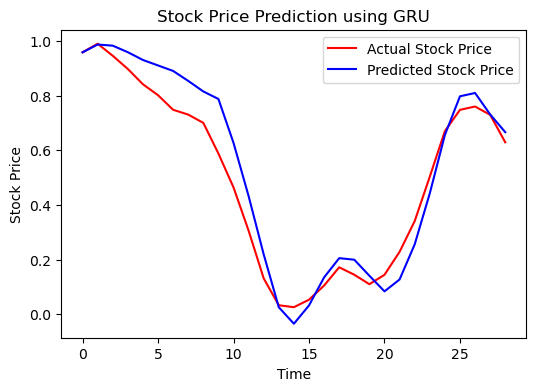

In [103]:
# Model Evaluation and Results Visualization

from sklearn.metrics import r2_score, mean_squared_error

# Making Predictions on the Test Set
y_pred = model.predict(X_test)

# Inverse Transforming the Predictions and Actuals
y_pred_rescaled = scaler.inverse_transform(np.column_stack((y_pred, y_pred, y_pred, y_pred)))[:, 0]
y_test_rescaled = scaler.inverse_transform(np.column_stack((y_test, y_test, y_test, y_test)))[:, 0]

# Calculating RMSE and R-squared
rmse = np.sqrt(mean_squared_error(y_test_rescaled, y_pred_rescaled))
r2 = r2_score(y_test_rescaled, y_pred_rescaled)

print(f'Root Mean Squared Error (RMSE): {rmse}')
print(f'R-squared: {r2}')

# Calculating Accuracy Based on Direction (Up or Down)
y_test_direction = np.sign(np.diff(y_test_rescaled))  # Direction for actual values
y_pred_direction = np.sign(np.diff(y_pred_rescaled))  # Direction for predicted values

# Ensuring both directions have the same length by trimming the first element
y_test_direction = y_test_direction[1:]
y_pred_direction = y_pred_direction[1:]

# Calculating accuracy based on direction prediction
correct_direction = np.sum(y_test_direction == y_pred_direction)
accuracy = correct_direction / len(y_test_direction)
print(f'Accuracy based on direction: {accuracy * 100:.2f}%')

# Plotting the Results
plt.figure(figsize=(6, 4))

# Plotting actual stock price
plt.plot(y_test_rescaled, color='red', label='Actual Stock Price')

# Plotting predicted stock price
plt.plot(y_pred_rescaled, color='blue', label='Predicted Stock Price')

plt.title('Stock Price Prediction using GRU')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.show()


** Named Entity Recognition on news data **

In [105]:
import pandas as pd
import spacy

# Loading the pre-trained spaCy NER model
nlp = spacy.load("en_core_web_sm")

data = {
    'date': ['2023-07-03', '2023-07-05', '2023-07-06'],
    'headline': [
        'Apple launches new iPhone in the US market',
        'Tesla stocks rise as Elon Musk hints at new product',
        'Google to invest heavily in AI research in Europe'
    ]
}

# Creating the DataFrame
news_df = pd.DataFrame(data)

# Initializing a list to store the extracted entities
entities_list = []

# Looping through each headline to extract named entities
for index, row in news_df.iterrows():
    headline = row['headline']
    
    # Processing the headline text using spaCy NER
    doc = nlp(headline)
    entities = {'ORG': [], 'PERSON': [], 'GPE': [], 'MONEY': [], 'PRODUCT': [], 'LOC': []}
    
    # Extracting entities from the headline
    for ent in doc.ents:
        if ent.label_ == 'ORG':
            entities['ORG'].append(ent.text)
        elif ent.label_ == 'PERSON':
            entities['PERSON'].append(ent.text)
        elif ent.label_ == 'GPE':
            entities['GPE'].append(ent.text)
        elif ent.label_ == 'MONEY':
            entities['MONEY'].append(ent.text)
        elif ent.label_ == 'PRODUCT':
            entities['PRODUCT'].append(ent.text)
        elif ent.label_ == 'LOC':
            entities['LOC'].append(ent.text)
    
    # Appending the entities to the list
    entities_list.append(entities)

# Adding the extracted entities to the DataFrame
news_df['entities'] = entities_list

# Displaying the updated DataFrame with the extracted entities
print(news_df[['date', 'headline', 'entities']])


         date                                           headline  \
0  2023-07-03         Apple launches new iPhone in the US market   
1  2023-07-05  Tesla stocks rise as Elon Musk hints at new pr...   
2  2023-07-06  Google to invest heavily in AI research in Europe   

                                            entities  
0  {'ORG': ['Apple'], 'PERSON': [], 'GPE': ['US']...  
1  {'ORG': [], 'PERSON': ['Elon Musk'], 'GPE': []...  
2  {'ORG': [], 'PERSON': [], 'GPE': ['AI'], 'MONE...  


In [107]:
# Extracting and count occurrences of entities
org_entities = [ent for sublist in news_df['entities'] for ent in sublist['ORG']]
person_entities = [ent for sublist in news_df['entities'] for ent in sublist['PERSON']]
product_entities = [ent for sublist in news_df['entities'] for ent in sublist['PRODUCT']]
gpe_entities = [ent for sublist in news_df['entities'] for ent in sublist['GPE']]

# Frequency counts
org_count = pd.Series(org_entities).value_counts()
person_count = pd.Series(person_entities).value_counts()
product_count = pd.Series(product_entities).value_counts()
gpe_count = pd.Series(gpe_entities).value_counts()

# Displaying counts
print("Top Organizations:\n", org_count.head())
print("Top People:\n", person_count.head())
print("Top Products:\n", product_count.head())


Top Organizations:
 Apple    1
Name: count, dtype: int64
Top People:
 Elon Musk    1
Name: count, dtype: int64
Top Products:
 Series([], Name: count, dtype: int64)


In [109]:
from textblob import TextBlob

# Calculating sentiment of each headline
news_df['headline_sentiment'] = news_df['headline'].apply(lambda x: TextBlob(x).sentiment.polarity)

# Filtering the sentiment of articles mentioning a specific organization
apple_news = news_df[news_df['entities'].apply(lambda x: 'Apple' in x['ORG'])]
apple_sentiment = apple_news['headline_sentiment'].mean()

print(f"Average sentiment for Apple: {apple_sentiment}")


Average sentiment for Apple: 0.13636363636363635


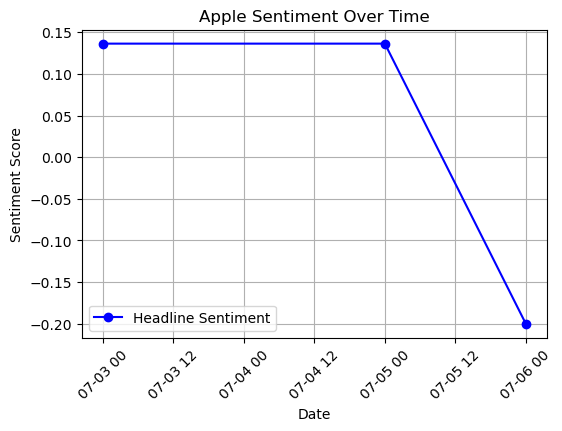

In [111]:
import matplotlib.pyplot as plt

# Assuming that `news_df` contains a column for dates and sentiment
news_df['date'] = pd.to_datetime(news_df['date'])  # Ensure dates are in datetime format

# Assuming we have a 'headline_sentiment' column for sentiment scores
news_df['headline_sentiment'] = news_df['headline'].apply(lambda x: TextBlob(x).sentiment.polarity)

# Ploting sentiment over time
plt.figure(figsize=(6, 4))
plt.plot(news_df['date'], news_df['headline_sentiment'], label='Headline Sentiment', marker='o', color='blue')
plt.xlabel('Date')
plt.ylabel('Sentiment Score')
plt.title('Apple Sentiment Over Time')
plt.xticks(rotation=45)
plt.grid(True)
plt.legend()
plt.show()
